<a href="https://colab.research.google.com/github/Tesla2000/rep/blob/main/Obliczenia_niepewno%C5%9Bci_pomiarowych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aplikacja do wykonywania obliczeń niepewności pomiarowych**


**Instrukcja**

Uruchomieniem aplikacja należy przesłać do pamięci serii plik z jaki ma zostać obrobiony:

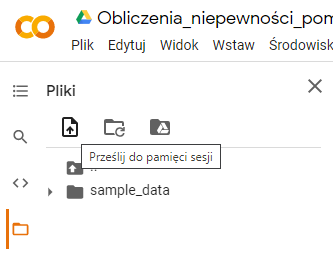

**Przygotowanie pliku**

Plik nie powinien zawierać niczego poza kolumnami z danymi używanymi w obliczeniach. Jeśli znajdują się w nim inne dane ,takie jak specyfikacja używanych przyrządów promiarowych, powinny one zostać uprzednio usunięte. Jeśli kolumny mają powtarzające się nazwy program rozróżnia je dodając do nich okeślony numer, po kropce: U [V].1, U [V].2

**Uruchamianie programu**

W celu uruchomienia programu należy wcisnąć kombiancję klawiszy Ctrl + F9.

Słownik poniżej zawiera spis poleceń jakie ma wykonać aplikacja, w przypadku nie wybranie poleceń niezbędne jest pozostawienie pustego słownika o nazwie polecenia. 

In [62]:
polecenia = {}

**Obsluga aplikacji**

**Nazwa pliku**

W przypadku pozostania słownika pustym po uruchomieniu aplikacji należy podać nazwę pliku, z którego odczytywane będą dane. Dopuszczalne jest podani pliku w formacie xlsx oraz csv. Plik musi się znajdować w pamięci sesji. Zamiast wprowadzać nazwę pliku po uruchomieniu programu, można dodać ją do słownika poleceć:

polecenia = {'dane z pliku': 'foto.xlsx'}

Po wpisaniu należy zatwierdzić wciskając Enter

**Wybór operacji**

Po wprowadzeniu nazwy możliwy będzie wybór jednej z 3 operacji

1-obliczenia niepewności

2-tworzenie dodatkowych kolumn

3-obliczenia dotyczące linii trendu

Można wybrać jedną z tych operacji wpisując odpowiednią liczbę lub dowolny inny tekst by przerwać działanie aplikacji. Zalecane jest by przed obliczaniem wartości kolejnych kolumn wykonać obliczenia niepewności pomiarowych. Obliczenia te wystarczy wykonać raz, nie trzeba ich ponawiać po utworzeniu dodatkowych kolumn.

Zamiast korzystać z wiersza poleceń można dodać do słownika następujące polecenie:

polecenia = {'operacja1': 1, 'operacja2': 2}


**Obliczanie niepewności**

W celu obliczenia niepewności należy wprowadzić do wiersza poleceń wzór na niepewność aparaturową, gdzie y to wartość pomiaru, następnie wcinąć Enter. Po obliczeniu niepewności typu B program zaokrągla ją do 1 lub 2 cyfr znacząych, w zależności od jej wartości. Wartości pomiarów zostają również zaokrąglone do odpowiednich wartości na podstawie zaokrągleń niepewności. 

W przypadku, gdy wzór na niepewność zmienia się wraz z wartością pomiaru można zastosować wzór z warunkiem:

0.05*y+0.5 if y>2 else 0.05*y + 0.05

Wzór należyć dla każdej kolumny osobno, nawet jeśli mają tę samą nazwę. Wpisywanie odbywa się od najbardziej lewej do najbardzie prawej komórki.

Zamiast wpisywać wzór w wiersz poleceń można dodać do słownika następujące polecenie:

polecenia = {'wzor1': '0.05*y', 'wzor2': '0.05*y+0.5 if y>2 else 0.05*y + 0.05'}

**Ograniczenia:** 

W obecnej wersji nie jest możliwe podawanie więcej niż jednego warunku, nie można stosować więc kostrukcji z elif.

Podobnie nie należy wpisywać do wzoru funkcji trygonometrycznych, ani innych zmiennych niż wartość pomiaru. Podczas egzekucji programu pojawiają się ostrzeżenia, nie są to jednak błędy i nie wpływają na efekt działania programu.

**Przykładowe obliczenia**

Po wpisaniu poprawnego wzoru należy wybrać numer wiersza, dla którego zostaną przeprowadzone przykładowe obliczenia niepewności. W przypadku wybrania 0 przykładowe obliczenia nie będą pokazane. 

By przekształcić obliczenia na formę akceptowalną w sprawozdaniach należy wkleić je do pliku latex lub do równania w pliku Word z zaznaczeniem odpowiedniej opcji.

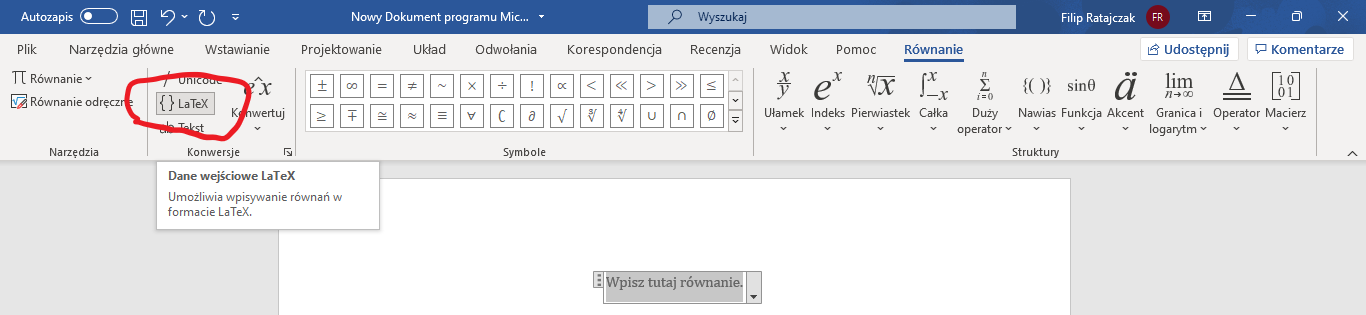

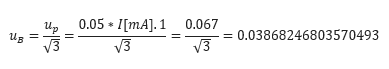

Zamiast wpisywać numer wiersza w wiersz poleceń można dodać do słownika następujące polecenie:



polecenia = {'wiersz1': 1, 'wiersz2': 2}

**Tworzenie dodatkowych kolumn**

Pozwala na tworzenie kolumny z nową zmienna. Np. poprzez wymnożenie kolumny I [mA] i U [V] można uzyskać kolumnę P [mW]. W tym celu należy wpisać w wiersz poleceń po zatwierdzeniu operacji 2, kolejno:

kolumna

P[mW]

U [V].1*I [mA].1

w celu uzyskania wzoru na niepewność pomiarową należy wybrać wartość wiersza, dla którego mają być przeprowadzone obliczenia. 

lub dodać do słownika polecenia:
 {'dodatkowy_element1': 'kolumna', 'nazwa1': 'P[mW]',
             'wzor_dod1': 'U [V].1*I [mA].1', 'wiersz3': 3}

Po utworzeniu kolumny program wróci do punku po wyborze operacji 2. W celu powrotu do wyboru operacji należy wcisnąć Enter bez wpisywanie w wiersz poleceń 'kolumna' ani 'wartość'


**Tworzenie dodatkowych wartości**

Jest elementem tworzenia dodatkowych kolumn. Pozwala na utworzeniu stałej, z niepewnością pomiarową wchodzącą w skład niepewności typu c danej kolumny.

W celu utworzenia wartości należy po wybraniu operacji 2 wpisać w wiersz poleceń wartość następnie podać jej nazwę oraz wzór (stała nie powinna zależeć do wartości jakiegokolwiek pomiaru, w tym celu stosowana jest kolumna) oraz wartość niepewności.

procedurze odpowiada wpisanie w słownik następującego kodu:

{'dodatkowy_element2': 'wartość', 'nazwa2': 'pole[m^2]', 'wzor_dod2': '123', 'wzor3': '1'}

wzor3 oznacza wzór na niepewność aparaturową

**Obliczenia dotyczące linii trendu** można wybrać używając operacji 3. Następnie wpisać nazwę kolumny, z której zostaną zebrane wartości argumentów oraz kolejno kolumny y, z których mają zostać zebrane wartości. Na każdą z wybranych kolumn y zostają wykonane oblicznia parametrów linii trendu takich jak współczynnik kieurnkowy, błąd zera, histereza.

Odpowiednikiem poleceń w słowniku jest:
'linia1': {'x': 'P[W]', 'y': 'I [mA].1'}

**Zapisywanie danych**

Odbywa się poprzez wytworzenie przez aplikację nowego pliku lub nadpisanie istniejącego. Zapisany plik dostępny jest w pamięci sesji. Cel zapisu można umieścić w słowniku, w nastepujący sposób:

{ 'dane do pliku': 'dane.xlsx'}

**Słownik polecenia informacja końcowa**

Kolejność umieszczania informacji w słowniku jest nieistotna. O kolejności wykonywania operacji przez słownik decyduje liczba występująca po nazwie polecenia. Najpierw wykonywana jest operacja1 potem operacja2 itd.

Główna część kodu znajduje się w wierszu poniżej, możliwe jest jej modyfikowanie w zależności od potrzeb.

In [63]:
#@title
import pandas as pd
import numpy as np
import sympy as sy


def pozycja(liczba):
    miejsce = -1
    if str(liczba)[0] != "0" and str(liczba).find(".") != -1:
        return str(liczba).find(".") - 2
    elif str(liczba)[0] != "0" and str(liczba).find(".") == -1:
        return len(str(liczba)) - 2
    while str(liczba)[0] == "0":
        liczba *= 10
        miejsce -= 1
    return miejsce


def round_up(liczba, miejsce):
    if liczba > round(liczba, -miejsce):
        liczba = round(liczba, -miejsce)
        liczba += 10 ** miejsce
    else:
        liczba = round(liczba, -miejsce)
    liczba = round(liczba, zaokraglenie(liczba) + 1)
    return liczba


def generuj_napis(elementy, wzor, wiersz, nazwa, wartosci, do_pracy):
    napis = (
        "Obliczono niepewność pomiarową "
        + nazwa
        + " typu B. "
        + "Dla wiersza "
        + str(wiersz)
        + "\n"
        + "u_B = "
    )
    napis += ""
    ulamki = str()
    lista_pomocnicza = list()
    for element in elementy:
        lista_pomocnicza.append("Δ" + element)
    elementy2 = elementy + lista_pomocnicza
    for element in elementy:
        ulamki += (
            "\n\sqrt{ + ("
            + chr(92)
            + "frac{\partial "
            + wzor
            + "}{\partial "
            + element
            + "}"
            + chr(92)
            + "bulletΔ"
            + element
            + ")^2}"
        )
    ulamki = ulamki.replace(" + ", "", 1)
    napis += ulamki.replace("**", "^")
    napis += " \n= \sqrt{"
    napis_pomocniczy = przekasztalc(wzor, elementy).replace(")**0.5", "}")
    napis_pomocniczy = napis_pomocniczy.replace("(", "", 1)
    napis += napis_pomocniczy.replace("**", "^")
    napis += " = \sqrt{("
    napis_pomocniczy = przekasztalc(wzor, elementy)
    elementy.sort(key=lambda k: len(k), reverse=True)
    for element in elementy2:
        if element in napis_pomocniczy and element in list(do_pracy.columns):
            start = 0
            for i in range(100):
                if wyrazenie_logiczne2(napis_pomocniczy, element, start):
                    napis_pomocniczy = napis_pomocniczy[:start] + napis_pomocniczy[
                        start:
                    ].replace(
                        element,
                        'str(do_pracy["' + element + '"][' + str(wiersz - 1) + ']) + "',
                        1,
                    )
                start = napis_pomocniczy.find(element, start) + 1
        if element in napis_pomocniczy and element in wartosci:
            start = 0
            for i in range(100):
                if wyrazenie_logiczne2(napis_pomocniczy, element, start):
                    napis_pomocniczy = napis_pomocniczy[:start] + napis_pomocniczy[
                        start:
                    ].replace(element, 'str(wartosci["' + element + '"]) + "', 1)
                    start = napis_pomocniczy.find(element, start) + 1
    napis_pomocniczy = napis_pomocniczy.replace('Δstr(do_pracy["', 'str(do_pracy["Δ')
    napis_pomocniczy = napis_pomocniczy.replace('str(do_pracy["', '" + str(do_pracy["')
    napis_pomocniczy = napis_pomocniczy.replace('Δstr(wartosci["', 'str(wartosci["Δ')
    napis_pomocniczy = napis_pomocniczy.replace('str(wartosci["', '" + str(wartosci["')
    napis_pomocniczy = napis_pomocniczy.replace('" + ', "", 1)
    napis_pomocniczy = napis_pomocniczy.replace(")**0.5", '}"))')
    napis_pomocniczy = napis_pomocniczy.replace("**", "^")
    napis_pomocniczy = napis_pomocniczy.replace("((", '(("', 1)
    napis_pomocniczy = napis_pomocniczy.replace("str", '" + str', 1)
    napis += eval(napis_pomocniczy)
    napis += " \n= "
    napis += str(do_pracy["Δ" + nazwa][wiersz - 1])
    return napis


def przekasztalc(wzor, elementy):
    i = int()
    litera_poczatkowa = 192
    symbole = list()
    tlumacz = dict()
    wzor_koncowy = str()
    for element in elementy:
        while element in wzor:
            wzor = wzor.replace(element, chr(i + litera_poczatkowa))
        symbole.append(chr(i + litera_poczatkowa))
        tlumacz[chr(i + litera_poczatkowa)] = element
        i += 1
    i = int()
    for symbol in symbole:
        if symbol in wzor:
            symbol = sy.symbols(symbol)
            pochodna = sy.Derivative(wzor, symbol)
            pochodna = pochodna.doit()
            wzor_koncowy += (
                " + (" + str(pochodna) + "*Δ" + chr(litera_poczatkowa + i) + ")**2"
            )
            i += 1
    wzor_koncowy = wzor_koncowy.replace(" + ", "(", 1)
    wzor_koncowy += ")**0.5"
    for zmiana in tlumacz:
        wzor_koncowy = wzor_koncowy.replace(zmiana, tlumacz[zmiana])
    return wzor_koncowy


def miejsca_zaczace(liczba):
    liczba = abs(liczba)
    if liczba == 0:
        return liczba
    if (
        abs(round_up(liczba, pozycja(liczba)) - round_up(liczba, pozycja(liczba) + 1))
        / round_up(liczba, pozycja(liczba) + 1)
        < 0.1
    ):
        return round_up(liczba, pozycja(liczba) + 1)
    return round_up(liczba, pozycja(liczba))


def miejsca_znaczace_array(array):
    result = list()
    for element in array:
        element = miejsca_zaczace(element)
        result.append(element)
    return np.array(result)


def miejsca_znaczace_blad(do_pracy, kolumna):
    for i in range(len(do_pracy[kolumna])):
        if do_pracy[kolumna][i] != 0.0:
            do_pracy[kolumna][i] = round(
                do_pracy[kolumna][i], zaokraglenie(do_pracy["Δ" + kolumna][i])
            )
    return do_pracy[kolumna]


def zaokraglenie(liczba):
    if liczba == 0.0:
        return 100
    liczba = str(liczba)
    if liczba[0] != "0":
        liczba = liczba[: max(3, liczba.find(".") + 1)]
        return -liczba.count("0") + 1
    else:
        pozycja = 0
        while liczba[pozycja] == "0" or liczba[pozycja] == ".":
            pozycja += 1
        if len(liczba) - 1 == pozycja:
            return pozycja - 1
        elif liczba[pozycja + 1] != "0":
            return pozycja
        else:
            return pozycja - 1


def niepewnosc_b(wzor, z):
    y = z.copy()
    if wzor.find("if") == -1:
        wzor = eval(wzor)
        for wyraz in range(len(wzor)):
            wzor[wyraz] = miejsca_zaczace(wzor[wyraz] / (3 ** 0.5))
        return wzor
    else:
        wzor = wzor.replace("y", "y[i]")
        else_statement = wzor[wzor.find("else") :]
        start_statement = wzor[: wzor.find("if")]
        if_statement = wzor[wzor.find("if") : wzor.find("else")]
        for i in range(len(y)):
            y[i] = (
                eval(start_statement + " " + if_statement + " " + else_statement)
            ) / 3 ** 0.5
            y[i] = miejsca_zaczace(y[i])
        return y


def niepewnosc_b_wzgledna(wzor, z):
    y = z.copy()
    if wzor.find("if") == -1:
        wzor = eval(wzor)
        for wyraz in range(len(wzor)):
            wzor[wyraz] = miejsca_zaczace(wzor[wyraz] / y[wyraz] / (3 ** 0.5))
        return wzor * 100
    else:
        wzor = wzor.replace("y", "y[i]")
        else_statement = wzor[wzor.find("else") :]
        start_statement = wzor[: wzor.find("if")]
        if_statement = wzor[wzor.find("if") : wzor.find("else")]
        for i in range(len(y)):
            if z[i] != 0.0:
                y[i] = (
                    (eval(start_statement + " " + if_statement + " " + else_statement))
                    / 3 ** 0.5
                    / z[i]
                )
                y[i] = miejsca_zaczace(y[i])
        return y * 100


def wyrazenie_logiczne(wzor1, element, start):
    if not wzor1.find(element, start) == 0:
        if (
            wzor1[wzor1.find(element, start) - 1].isalpha()
            or wzor1[wzor1.find(element, start) - 1] == '"'
        ) and wzor1[wzor1.find(element, start) - 1] != "Δ":
            return False
        else:
            if not wzor1.find(element, start) + len(element) == len(wzor1):
                if (
                    wzor1[wzor1.find(element, start) + len(element)].isalpha()
                    or wzor1[wzor1.find(element, start) + len(element)] == '"'
                    or wzor1[wzor1.find(element, start) + len(element)] == "."
                ):
                    return False
                else:
                    return True
            else:
                return True
    else:
        if not wzor1.find(element) + len(element) == len(wzor1):
            if (
                wzor1[wzor1.find(element) + len(element)].isalpha()
                or wzor1[wzor1.find(element, start) + len(element)] == "."
            ):
                return False
            else:
                return True
        else:
            return True


def wyrazenie_logiczne2(wzor1, element, start):
    if not wzor1.find(element, start) == 0:
        if (
            wzor1[wzor1.find(element, start) - 1].isalpha()
            or wzor1[wzor1.find(element, start) - 1] == '"'
        ):
            return False
        else:
            if not wzor1.find(element, start) + len(element) == len(wzor1):
                if (
                    wzor1[wzor1.find(element, start) + len(element)].isalpha()
                    or wzor1[wzor1.find(element, start) + len(element)] == '"'
                    or wzor1[wzor1.find(element, start) + len(element)] == "."
                ):
                    return False
                else:
                    return True
            else:
                return True
    else:
        if not wzor1.find(element) + len(element) == len(wzor1):
            if (
                wzor1[wzor1.find(element) + len(element)].isalpha()
                or wzor1[wzor1.find(element, start) + len(element)] == "."
                or wzor1[wzor1.find(element, start) + len(element)] == '"'
            ):
                return False
            else:
                return True
        else:
            return True


def jednostka_na_procent(napis):
    pocz = napis.find("[")
    kon = napis.find("]")
    napis = napis.replace(napis[pocz + 1 : kon], "%")
    return napis


def linia_trendu(x, y):
    wspolczynnik_kierunkowy = float()
    mianownik = float()
    for i in range(len(x)):
        mianownik += (x[i] - x.mean()) ** 2
    for i in range(len(x)):
        wspolczynnik_kierunkowy += ((x[i] - x.mean()) * (y[i] - y.mean())) / mianownik
    wyraz_wolny = miejsca_zaczace(y.mean() - wspolczynnik_kierunkowy * x.mean())
    linia_idealna = wspolczynnik_kierunkowy * x + wyraz_wolny
    blad_nieliniowosci = miejsca_zaczace(
        max(abs(y - linia_idealna)) / (x.max() - x.min())
    )
    histereza = list()
    for i in range(len(x)):
        x = list(x)
        a = x.count(x[i])
        mini_list = list()
        start = int()
        for j in range(a):
            mini_list.append(y[x.index(x[i], start)])
            start = x.index(x[i], start) + 1
        histereza.append(max(mini_list) - min(mini_list))
    histereza = miejsca_zaczace(max(histereza) / (max(y) - min(y)) * 100)
    r_kwadrat = sum(
        (wspolczynnik_kierunkowy * arg + wyraz_wolny - y.mean()) ** 2 for arg in x
    ) / sum((value - y.mean()) ** 2 for value in y)
    return locals()


def niepewnosc_b_show(wzor, wiersz, y):
    if wzor.find("if") == -1:
        wzor = eval(wzor)
        return wzor[wiersz]
    else:
        wzor = wzor.replace("y", "y[i]")
        else_statement = wzor[wzor.find("else") :]
        start_statement = wzor[: wzor.find("if")]
        if_statement = wzor[wzor.find("if") : wzor.find("else")]
        for i in range(len(y)):
            y[i] = eval(start_statement + " " + if_statement + " " + else_statement)
        return y[wiersz]


def tekst_edytowany(tekst):
    elementy = list()
    elementy.append(tekst[: (1 + tekst.find(":"))])
    tekst = tekst.replace(tekst[: (1 + tekst.find(":"))], "")
    elementy[-1] = elementy[-1].replace(":", "")
    elementy[-1] = elementy[-1].replace("y", "y[wiersz]")
    while ":" in tekst:
        elementy.append(
            tekst[
                : min(
                    tekst.find("elif") if tekst.find("elif") > 0 else 1000,
                    tekst.find("else") if tekst.find("else") > 0 else 1000,
                    1 + tekst.find(":"),
                )
            ]
        )
        tekst = tekst.replace(
            tekst[
                : min(
                    tekst.find("elif") if tekst.find("elif") > 0 else 1000,
                    tekst.find("else") if tekst.find("else") > 0 else 1000,
                    1 + tekst.find(":"),
                )
            ],
            "",
        )
        elementy[-1] = elementy[-1].replace(":", "")
        elementy[-1] = elementy[-1].replace("y", "y[wiersz]")
    elementy.append(tekst)
    return elementy


def niepewnosci(do_pracy, polecenia=dict()):
    global licznik_wiersz, licznik_wzor
    kolejnosc_column = list()
    for i in range(len(do_pracy.columns)):
        if "Unnamed" not in do_pracy.columns[i]:
            licznik_wzor += 1
            x = do_pracy.columns[i]
            y = do_pracy[x].copy()
            if not polecenia.get("wzor" + str(licznik_wzor), False):
                wzor = input(
                    "Wzór na niepewność aparaturową "
                    + str(x)
                    + " (należy wpisywać w postaci wielomianu gdzie y to wynik pomiaru): "
                )
            else:
                wzor = polecenia["wzor" + str(licznik_wzor)]
            wzor = wzor.replace("**", "^")
            wzor_py = wzor
            if wzor.find("y") == -1:
                wzor_py = wzor + "*y/y"
            wzor_py = wzor_py.replace("^", "**")
            wzor = wzor.replace("y", str(x))
            licznik_wiersz += 1
            if not polecenia.get("wiersz" + str(licznik_wiersz), False):
                wiersz = int(
                    input(
                        "Wprowadź wiersz, dla którego mają być wykonane przykładowe obliczenie (0 oznacza brak obliczeń): "
                    )
                )
            else:
                wiersz = polecenia["wiersz" + str(licznik_wiersz)]
            do_pracy["Δ" + str(x)] = niepewnosc_b(str(wzor_py), y)
            y = do_pracy[x].copy()
            if wiersz != 0:
                print(
                    "Obliczono niepewnosc pomiarową "
                    + str(x)
                    + " typu B."
                    + "Dla wiersza "
                    + str(wiersz)
                    + "\n"
                    + "u_B = "
                    + chr(92)
                    + "frac{u_p}{\sqrt3} = "
                    + chr(92)
                    + "frac{"
                    + wzor
                    + "}{\sqrt3} = "
                    + chr(92)
                    + "frac{"
                    + str(niepewnosc_b_show(str(wzor_py), wiersz - 1, y))
                    + "}{\sqrt3} = "
                    + str(niepewnosc_b_show(str(wzor_py), wiersz - 1, y) / 3 ** 0.5)
                    + "\nPo zaokrągleniu "
                    + str(niepewnosc_b(wzor_py, y)[wiersz - 1])
                )
            y = do_pracy[x].copy()
            do_pracy["δ" + jednostka_na_procent(str(x))] = niepewnosc_b_wzgledna(
                str(wzor_py), y
            )
            kolejnosc_column.extend(
                [x, "Δ" + str(x), "δ" + jednostka_na_procent(str(x))]
            )
    do_pracy = do_pracy[kolejnosc_column]
    for kolumna in list(do_pracy.columns):
        if "Δ" not in kolumna and "δ" not in kolumna and "Unnamed" not in kolumna:
            do_pracy[kolumna] = miejsca_znaczace_blad(do_pracy, kolumna)
    if not polecenia.get("dane do pliku", False):
        do_pracy.to_excel(input("Do jakiego pliku zapisać wyniki: "), index=False)
    else:
        do_pracy.to_excel(polecenia["dane do pliku"])


def dodatkowowe_kolumny(do_pracy, polecenia=dict()):
    global licznik_dodatkowych_elemetow, licznik_nazwy, licznik_wzor_dod, licznik_wiersz, licznik_wzor
    licznik_dodatkowych_elemetow += 1
    if not polecenia.get(
        "dodatkowy_element" + str(licznik_dodatkowych_elemetow), False
    ):
        kolejne_polecenie = input("Dodatkowe obliczenia (kolumna/wartość): ")
    else:
        kolejne_polecenie = polecenia[
            "dodatkowy_element" + str(licznik_dodatkowych_elemetow)
        ]
    wartosci = dict()
    elements = list()
    kolejnosc_column = list(do_pracy.columns)
    while kolejne_polecenie == "kolumna" or kolejne_polecenie == "wartość":
        licznik_dodatkowych_elemetow += 1
        licznik_nazwy += 1
        if not polecenia.get("nazwa" + str(licznik_nazwy), False):
            nazwa = input("Podaj nazwę: ")
        else:
            nazwa = polecenia["nazwa" + str(licznik_nazwy)]
        licznik_wzor_dod += 1
        if not polecenia.get("wzor_dod" + str(licznik_wzor_dod), False):
            wzor = input("Podaj wzór: ")
        else:
            wzor = polecenia["wzor_dod" + str(licznik_wzor_dod)]
        if kolejne_polecenie == "wartość":
            for wartosc in wartosci:
                if wartosc in wzor:
                    wzor = wzor.replace(wartosc, 'wartosci["' + wartosc + '"]')
            wartosc = eval(wzor)
            wartosci[nazwa] = wartosc
            if not polecenia.get("wzor" + str(licznik_wzor), False):
                wzor_na_blad = input(
                    "Podaj wzor na niepewność (gdzie y to wartość pomiaru): "
                )
            else:
                wzor_na_blad = polecenia["wzor" + str(licznik_wzor)]
            if "y" in wzor_na_blad:
                wzor_na_blad = wzor_na_blad.replace("y", "wartosc")
            wartosci["Δ" + nazwa] = miejsca_zaczace(eval(wzor_na_blad) / 3 ** 0.5)
            wartosci["δ" + jednostka_na_procent(nazwa)] = miejsca_zaczace(
                eval(wzor_na_blad) / 3 ** 0.5 / wartosc * 100
            )
        else:
            wzor1 = wzor
            for element in do_pracy.columns:
                if element in wzor1:
                    start = 0
                    for i in range(100):
                        if wyrazenie_logiczne(wzor1, element, start):
                            wzor1 = wzor1[:start] + wzor1[start:].replace(
                                element, 'do_pracy["' + element + '"]', 1
                            )
                        start = wzor1.find(element, start) + 1
            for wartosc in wartosci:
                if wartosc in wzor1:
                    start = 0
                    for i in range(100):
                        if wyrazenie_logiczne(wzor1, wartosc, start):
                            wzor1 = wzor1[:start] + wzor1[start:].replace(
                                wartosc, 'wartosci["' + wartosc + '"]', 1
                            )
                        start = wzor1.find(wartosc, start) + 1
            do_pracy[nazwa] = eval(wzor1)
            kolejnosc = sorted(
                list(do_pracy.columns[:-1]), key=lambda k: len(k), reverse=True
            )
            for element in kolejnosc:
                if element in wzor:
                    elements.append(element)
            for element in wartosci:
                if element in wzor:
                    elements.append(element)
            wzor_niepewnosc = przekasztalc(wzor, elements)
            kolejnosc = sorted(
                list(do_pracy.columns[:-1]), key=lambda k: len(k), reverse=True
            )
            for element in kolejnosc:
                if element in wzor_niepewnosc:
                    start = 0
                    for i in range(100):
                        if wyrazenie_logiczne(wzor_niepewnosc, element, start):
                            wzor_niepewnosc = wzor_niepewnosc[:start] + wzor_niepewnosc[
                                start:
                            ].replace(element, 'do_pracy["' + element + '"]', 1)
                        start = wzor_niepewnosc.find(element, start) + 1
                wzor_niepewnosc = wzor_niepewnosc.replace('Δdo_pracy["', 'do_pracy["Δ')
            for wartosc in wartosci:
                if wartosc in wzor_niepewnosc:
                    start = 0
                    for i in range(100):
                        if wyrazenie_logiczne(wzor_niepewnosc, wartosc, start):
                            wzor_niepewnosc = wzor_niepewnosc[:start] + wzor_niepewnosc[
                                start:
                            ].replace(wartosc, 'wartosci["' + wartosc + '"]', 1)
                        start = wzor_niepewnosc.find(wartosc, start) + 1
            wzor_niepewnosc = wzor_niepewnosc.replace('Δwartosci["', 'wartosci["Δ')
            do_pracy["Δ" + nazwa] = miejsca_znaczace_array(eval(wzor_niepewnosc))
            do_pracy["δ" + jednostka_na_procent(nazwa)] = miejsca_znaczace_array(
                eval(wzor_niepewnosc) / do_pracy[nazwa] * 100
            )
            kolejnosc_column.extend(
                [nazwa, "Δ" + nazwa, "δ" + jednostka_na_procent(nazwa)]
            )
            licznik_wiersz += 1
            if not polecenia.get("wiersz" + str(licznik_wiersz), False):
                wiersz = int(
                    input(
                        "Wprowadź wiersz, dla którego mają być wykonane przykładowe obliczenie (0 oznacza brak obliczeń): "
                    )
                )
            else:
                wiersz = polecenia["wiersz" + str(licznik_wiersz)]
            elements.sort(key=lambda k: len(k), reverse=True)
            if wiersz != 0:
                try:
                    print(
                        generuj_napis(elements, wzor, wiersz, nazwa, wartosci, do_pracy)
                    )
                except:
                    print("Nie udało się wygenerować napisu")
        do_pracy = do_pracy[kolejnosc_column]
        try:
            for kolumna in list(do_pracy.columns):
                if (
                    "Δ" not in kolumna
                    and "δ" not in kolumna
                    and "Unnamed" not in kolumna
                ):
                    do_pracy[kolumna] = miejsca_znaczace_blad(do_pracy, kolumna)
        except KeyError:
            print(
                "Nie udało się zaokrąglić do odpowiedniej postaci. By zaokrąglenie przebiegło prawidłowo należy we "
                "wzorze na wartości kolumny podać stałą w postaci liczby. Nie wiem dlaczego."
            )
        if kolejne_polecenie == "kolumna":
            if not polecenia.get("dane do pliku", False):
                do_pracy.to_excel(
                    input("Do jakiego pliku zapisać wyniki: "), index=False
                )
            else:
                do_pracy.to_excel(polecenia["dane do pliku"])
        if not polecenia.get(
            "dodatkowy_element" + str(licznik_dodatkowych_elemetow), False
        ):
            kolejne_polecenie = input("Dodatkowe obliczenia (kolumna/wartość): ")
        else:
            kolejne_polecenie = polecenia[
                "dodatkowy_element" + str(licznik_dodatkowych_elemetow)
            ]


def obliczenia_linia(do_pracy, polecenia=dict()):
    global licznik_linia
    if polecenia.get("linia" + str(licznik_linia), False):
        if not polecenia["linia" + str(licznik_linia)].get("x", False):
            x = input("oś x-ów (nazwa kolumny tabeli): ")
        else:
            x = polecenia["linia" + str(licznik_linia)]["x"]
        if not polecenia["linia" + str(licznik_linia)].get("y", False):
            while True:
                y = input(
                    "oś y-ów (nazwa kolumny tabeli), by przerwać dodawania wpisz pass: "
                )
                if y == "pass":
                    return None
                print(
                    "Histeraza: " + str(linia_trendu(do_pracy[x], do_pracy[y])["histereza"])
                )
                print(
                    "Współczynnik kierunkowy: "
                    + str(linia_trendu(do_pracy[x], do_pracy[y])["wspolczynnik_kierunkowy"])
                )
                print(
                    "Błąd nieliniowości: "
                    + str(linia_trendu(do_pracy[x], do_pracy[y])["blad_nieliniowosci"])
                )
                print(
                    "Błąd zera: "
                    + str(linia_trendu(do_pracy[x], do_pracy[y])["wyraz_wolny"])
                )
                print("R-kwadrat:", linia_trendu(do_pracy[x], do_pracy[y])["r_kwadrat"])
        else:
            y = polecenia["linia" + str(licznik_linia)]["y"]
            print("Histeraza: " + str(linia_trendu(do_pracy[x], do_pracy[y])["histereza"]))
            print(
                "Współczynnik kierunkowy: "
                + str(linia_trendu(do_pracy[x], do_pracy[y])["wspolczynnik_kierunkowy"])
            )
            print(
                "Błąd nieliniowości: "
                + str(linia_trendu(do_pracy[x], do_pracy[y])["blad_nieliniowosci"])
            )
            print(
                "Błąd zera: " + str(linia_trendu(do_pracy[x], do_pracy[y])["wyraz_wolny"])
            )
            print("R-kwadrat:", linia_trendu(do_pracy[x], do_pracy[y])["r_kwadrat"])
    else:
        x = input("oś x-ów (nazwa kolumny tabeli): ")
        while True:
            y = input(
                "oś y-ów (nazwa kolumny tabeli), by przerwać dodawania wpisz pass: "
            )
            if y == "pass":
                return None
            print(
                "Histeraza: " + str(linia_trendu(do_pracy[x], do_pracy[y])["histereza"])
            )
            print(
                "Współczynnik kierunkowy: "
                + str(linia_trendu(do_pracy[x], do_pracy[y])["wspolczynnik_kierunkowy"])
            )
            print(
                "Błąd nieliniowości: "
                + str(linia_trendu(do_pracy[x], do_pracy[y])["blad_nieliniowosci"])
            )
            print(
                "Błąd zera: "
                + str(linia_trendu(do_pracy[x], do_pracy[y])["wyraz_wolny"])
            )
            print("R-kwadrat:", linia_trendu(do_pracy[x], do_pracy[y])["r_kwadrat"])


Przykładowy słownik poleceń:

polecenia = {'dane z pliku': 'foto.xlsx', 'dane do pliku': 'dane.xlsx', 'operacja1': 1, 'wzor1': '0.05*y', 'wzor2': '0.05*y+0.5 if y>2 else 0.05*y + 0.05', 'wiersz1': 1, 'wiersz2': 2, 'operacja2': 2, 'dodatkowy_element1': 'kolumna', 'nazwa1': 'P[mW]', 'wzor_dod1': 'U [V].1*I [mA].1', 'wiersz3': 3, 'linia1': {'x': 'P[mW]', 'y': 'I [mA].1'}, 'operacja3': 3, 'operacja4': 2, 'dodatkowy_element2': 'wartość', 'nazwa2': 'pole[m^2]', 'wzor_dod2': '123', 'wzor3': '1', 'dodatkowy_element3': 'kolumna', 'nazwa3': 'inne', 'wzor_dod3': 'P[mW]*pole[m^2]', 'wiersz4': '4'}

Część kodu poniżej odpowiedzialna za egzekucję programu, poniżej, nie powinna być modyfikowana.

In [ ]:
#@title 
if not polecenia.get("dane z pliku", False):
    nazwa = input("Wprowadź nazwę pliku: ")
    if nazwa.endswith('.xlsx'):
        do_pracy = pd.read_excel(nazwa)
    elif nazwa.endswith('.csv'):
        do_pracy = pd.read_csv(nazwa)
    else:
        print('Plik powinien być w formacie xlsx lub csv.')
else:
    nazwa = polecenia["dane z pliku"]
    if nazwa.endswith('.xlsx'):
        do_pracy = pd.read_excel(nazwa)
    elif nazwa.endswith('.csv'):
        do_pracy = pd.read_csv(nazwa)
    else:
        print('Plik powinien być w formacie xlsx lub csv.')

licznik = licznik_linia = 1
licznik_wiersz = licznik_wzor = licznik_dodatkowych_elemetow = licznik_nazwy = licznik_wzor_dod = 0
while True:
    if not polecenia.get("operacja" + str(licznik), False):
        try:
            operacja = int(
                input(
                    "Jaką operację wykonać (1-obliczenia niepewności), (2-tworzenie dodatkowych kolumn), (3-obliczenia dotyczące linii trendu): "
                )
            )
        except ValueError:
            break
    else:
        operacja = polecenia["operacja" + str(licznik)]
    licznik += 1
    if operacja == 1:
        niepewnosci(do_pracy, polecenia)
    elif operacja == 2:
        dodatkowowe_kolumny(do_pracy, polecenia)
    elif operacja == 3:
        obliczenia_linia(do_pracy, polecenia)
    else:
        break